#**Import necessary libraries for data processing and modeling**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from datetime import datetime, timedelta

#**Generate a synthetic air quality dataset for the past 100 days**

In [11]:
np.random.seed(42)
dates = pd.date_range(datetime.today() - timedelta(days=100), periods=100)

data = pd.DataFrame({
    'Date': dates,
    'PM2.5': np.random.uniform(10, 200, size=100),
    'PM10': np.random.uniform(20, 300, size=100),
    'NO2': np.random.uniform(5, 150, size=100),
    'CO': np.random.uniform(0.2, 2.0, size=100),
    'O3': np.random.uniform(10, 120, size=100)
})

#**Create air quality labels (Good, Moderate, Bad) based on pollutant levels**

In [12]:
conditions = [
    (data['PM2.5'] < 50) & (data['PM10'] < 100) & (data['NO2'] < 50),
    (data['PM2.5'].between(50, 100)) | (data['PM10'].between(100, 200)) | (data['NO2'].between(50, 100)),
    (data['PM2.5'] > 100) | (data['PM10'] > 200) | (data['NO2'] > 100)
]
choices = ['Good', 'Moderate', 'Bad']
data['AirQuality'] = np.select(conditions, choices, default='Moderate')

#**Split the dataset into training and testing sets**

In [13]:
X = data[['PM2.5', 'PM10', 'NO2', 'CO', 'O3']]
y = data['AirQuality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Train a Random Forest classifier on the training data**

In [14]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

#**Evaluate model performance using accuracy and F1 score**

In [15]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred, labels=['Good', 'Moderate', 'Bad'])

print("Model Performance:")
print(f"Accuracy: {acc:.3f}")
print(f"F1 Score: {f1:.3f}")

Model Performance:
Accuracy: 0.750
F1 Score: 0.737


#**Visualize the confusion matrix for model evaluation**

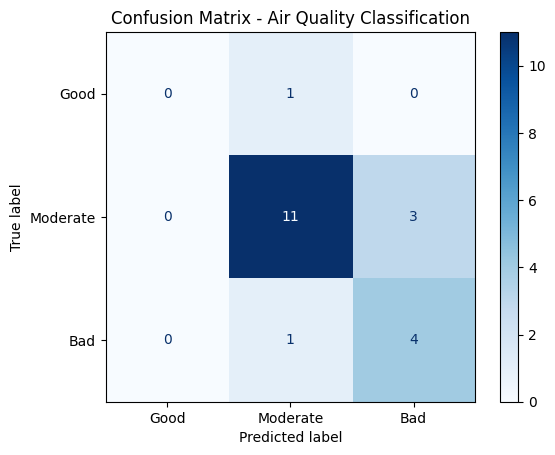

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Moderate', 'Bad'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Air Quality Classification")
plt.show()

#**Forecast air quality for the next seven days using the trained model**

In [17]:
future_dates = pd.date_range(data['Date'].iloc[-1] + timedelta(days=1), periods=7)

future_data = pd.DataFrame({
    'Date': future_dates,
    'PM2.5': np.random.uniform(10, 200, size=7),
    'PM10': np.random.uniform(20, 300, size=7),
    'NO2': np.random.uniform(5, 150, size=7),
    'CO': np.random.uniform(0.2, 2.0, size=7),
    'O3': np.random.uniform(10, 120, size=7)
})

future_data['Predicted_AirQuality'] = model.predict(future_data[['PM2.5', 'PM10', 'NO2', 'CO', 'O3']])
future_data[['Date', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'Predicted_AirQuality']]

,Date,PM2.5,PM10,NO2,CO,O3,Predicted_AirQuality
0,2025-10-16 19:14:42.308702,142.650726,250.310428,11.556707,0.885604,16.201305,Moderate
1,2025-10-17 19:14:42.308702,111.858310,285.943976,8.823211,1.945846,105.119461,Bad
2,2025-10-18 19:14:42.308702,68.810247,223.201462,59.587188,1.715814,99.419111,Moderate
3,2025-10-19 19:14:42.308702,164.621054,191.756255,122.530233,1.708992,119.968944,Moderate
4,2025-10-20 19:14:42.308702,140.098923,137.108050,148.155039,1.043648,119.630052,Moderate
5,2025-10-21 19:14:42.308702,40.897218,281.163975,26.810449,0.946675,71.097488,Bad
6,2025-10-22 19:14:42.308702,183.076165,262.497889,91.148954,0.692133,94.588616,Moderate


#**Plot the 7-day forecast showing PM2.5 levels and predicted air quality**

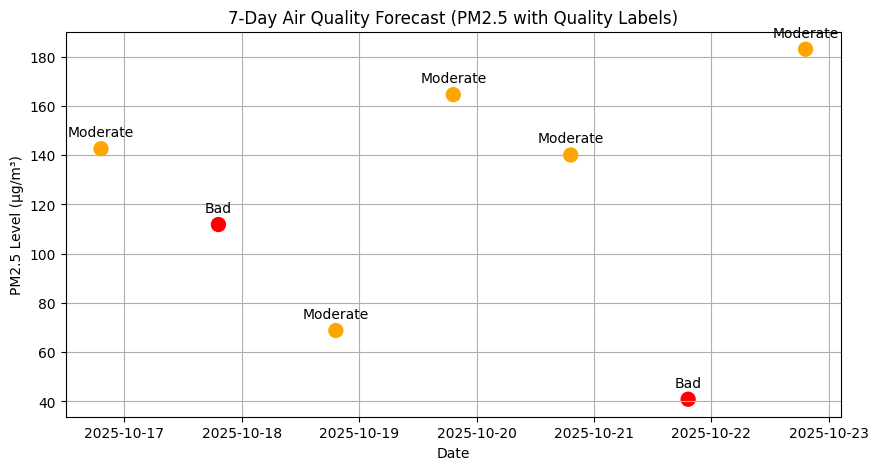

In [18]:
color_map = {'Good': 'green', 'Moderate': 'orange', 'Bad': 'red'}

plt.figure(figsize=(10,5))
plt.scatter(future_data['Date'], future_data['PM2.5'],
            c=future_data['Predicted_AirQuality'].map(color_map),
            s=100, label='PM2.5')

for i in range(len(future_data)):
    plt.text(future_data['Date'][i], future_data['PM2.5'][i] + 5,
             future_data['Predicted_AirQuality'][i], ha='center')

plt.title("7-Day Air Quality Forecast (PM2.5 with Quality Labels)")
plt.xlabel("Date")
plt.ylabel("PM2.5 Level (µg/m³)")
plt.grid(True)
plt.show()